In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:/Users/l_jor/OneDrive/Documents/GitHub/python-ml-course/datasets/ads/Advertising.csv")

In [3]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Distribuir la data en conjunto de evaluación y entrenamiento

(array([ 9., 21., 27., 39., 42., 37., 16.,  4.,  4.,  1.]),
 array([-2.19811882, -1.67276928, -1.14741973, -0.62207018, -0.09672064,
         0.42862891,  0.95397845,  1.479328  ,  2.00467754,  2.53002709,
         3.05537663]),
 <a list of 10 Patch objects>)

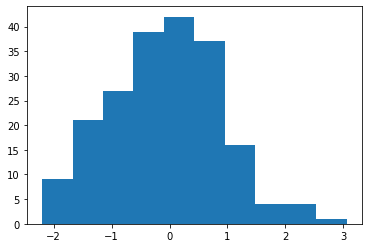

In [5]:
a = np.random.randn(len(data))
plt.hist(a)

In [22]:
check = (a < 0.8)
training = data[check]
testing = data[~check]
len(training), len(testing)

(169, 31)

In [9]:
lm = smf.ols(formula = "Sales~TV+Radio", data = training).fit()

In [23]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     693.8
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           2.44e-81
Time:                        21:31:35   Log-Likelihood:                -329.43
No. Observations:                 169   AIC:                             664.9
Df Residuals:                     166   BIC:                             674.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8266      0.329      8.580      0.000       2.176       3.477
TV             0.0459      0.002     29.390      0.000       0.043       0.049
Radio          0.1903      0.009     21.231      0.000       0.173       0.208
==============================================================================
Omnibus:                       57.076   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.496
Skew:                          -1.411   Prob(JB):                     2.09e-33
Kurtosis:                       6.661   Cond. No.                         429.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
print("El modelo lineal predictivo será sales = 2.8266 + 0.0459 * TV + 0.1903*Radio")

El modelo lineal predictivo será sales = 2.8266 + 0.0459 * TV + 0.1903*Radio


## Validación del modelo con el conjunto de testing

In [12]:
sales_pred = lm.predict(testing)
sales_pred

4      13.183560
8       3.621068
29      9.112999
33     18.828031
37     15.657023
47     21.739242
50     12.590736
52     20.698245
59     18.114951
75     11.918340
79      9.618216
80     11.415447
98     24.178154
102    17.614529
111    21.155870
114    15.322973
116    11.939425
128    22.266456
134    11.866194
136    11.423446
140     9.431860
143     8.714175
148    12.240200
150    18.360598
152    16.333623
164    11.005363
171    14.357061
184    18.533587
189     5.987755
191     8.348474
195     5.284686
dtype: float64

In [17]:
SSD = sum((testing["Sales"]-sales_pred)**2)
SSD

69.13469499047136

In [18]:
RSE = RSE = np.sqrt(SSD /(len(data)-3))
RSE

0.592399812645731

In [19]:
sales_mean = np.mean(testing["Sales"])

In [21]:
error = RSE / sales_mean
error

0.042285043039414376